In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer

In [5]:
# ==========================================================================
# Step 1. define goal
# ==========================================================================

# In this project, we will use the given dataset to build ML models
# In particular, we will use regression algorithms to build models 
# that can be used to predict House Sale Price

# Task 1. Review the machine learning introduction lecture (no coding needed)

In [6]:
# ==========================================================================
# Step 2. Data collection
# ==========================================================================
# Read the data description, see what information is available

# Task 2. import the datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [7]:
# ==========================================================================
# Step 3. Exploratory Data Analysis, Getting familiar with your data
# ==========================================================================

# Task 3.1. get descriptive statistics of your dataset
desc_stat = train.describe()

<Axes: >

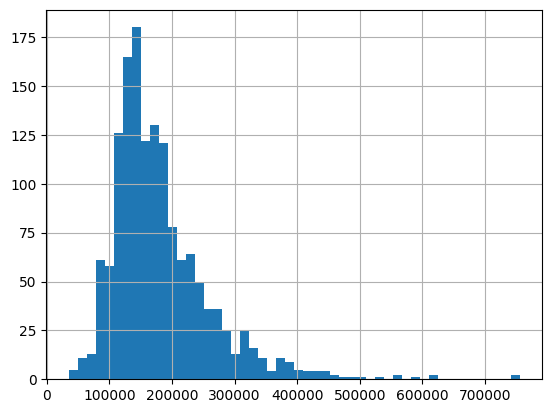

In [8]:
# Task 3.2. visualize the distribution of your label "SalePrice"
train['SalePrice'].hist(bins=50)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

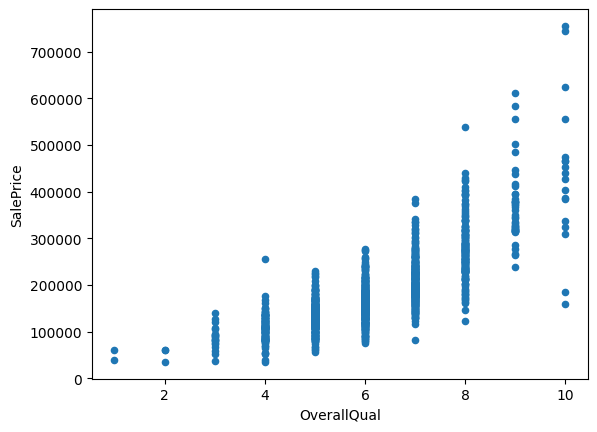

In [9]:
# Task 3.3 visualize the association between overall quality and sale price
train.plot.scatter(x='OverallQual', y='SalePrice')

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

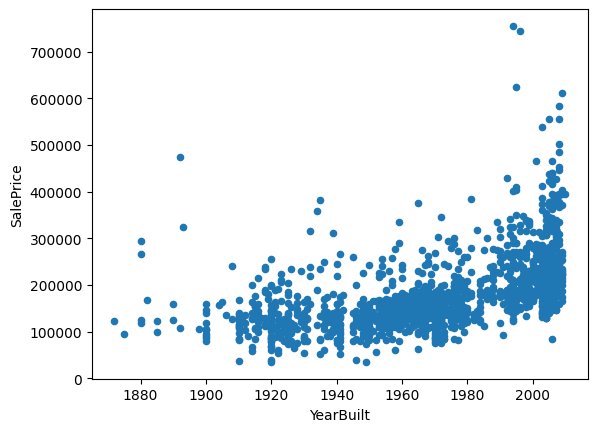

In [10]:
# Task 3.4. visualize the association between YearBuilt and SalePrice
train.plot.scatter(x='YearBuilt', y='SalePrice')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

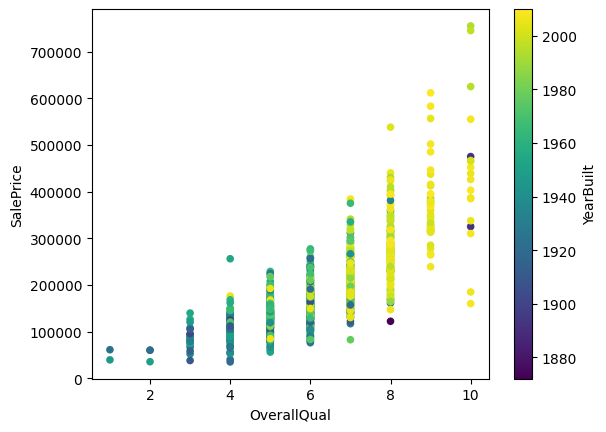

In [11]:
# Task 3.5. visualize the association between three variables:
# (1) overall quality 
# (2) SalePrice
# (3) YearBuilt 
# hint: use OverallQual as X, SalePrice as y, and YearBuilt as color scale
train.plot.scatter(x='OverallQual', y='SalePrice', c='YearBuilt', cmap='viridis')

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

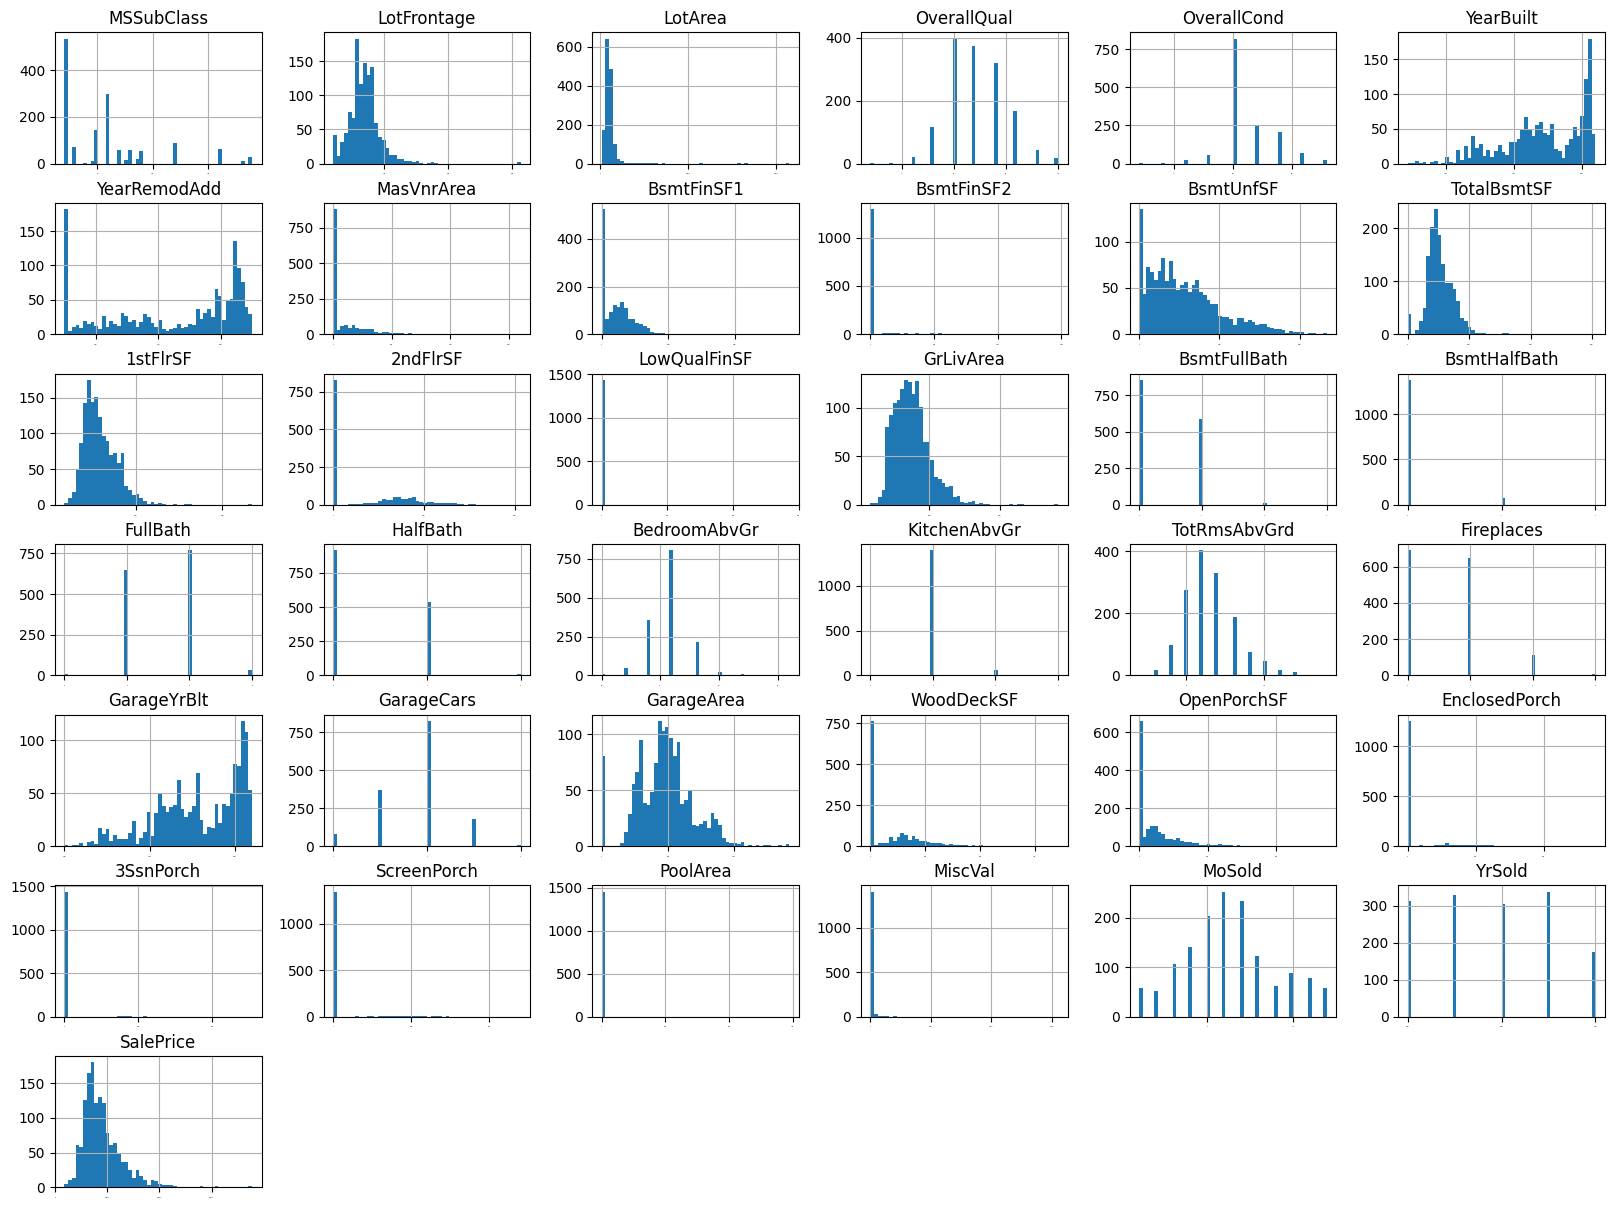

In [12]:
# Task 3.6. Display all distributions of numerical variables
train.iloc[:,1:].hist(bins=50, figsize=(20,15), xlabelsize=0.8)

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='FullBath', ylabel='SalePrice'>,
        <Axes: xlabel='YearBuilt', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel=

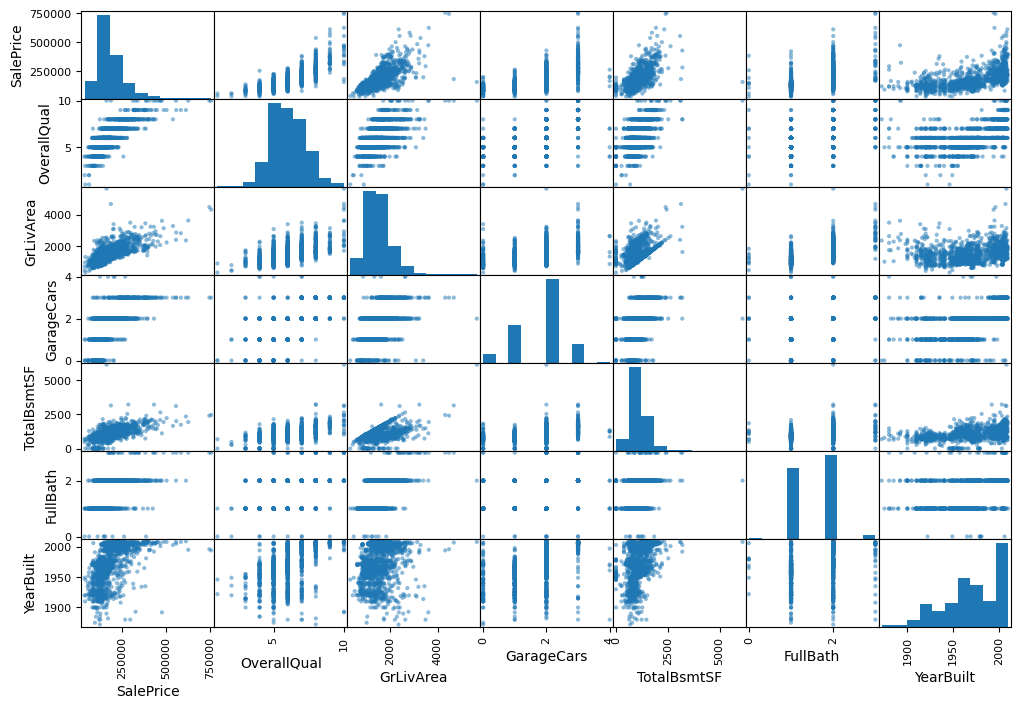

In [13]:
# Task 3.7.visualize the associations of a set of variables of interest
from pandas.plotting import scatter_matrix
interest_vars = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
scatter_matrix(train[interest_vars], figsize=(12, 8))

In [14]:
# Task 3.8. check how each variable is correlated with SalePrice
numeric_data = train.select_dtypes(include=[np.number])
corr_price = numeric_data.corr()['SalePrice'].sort_values(ascending=False)

<Axes: >

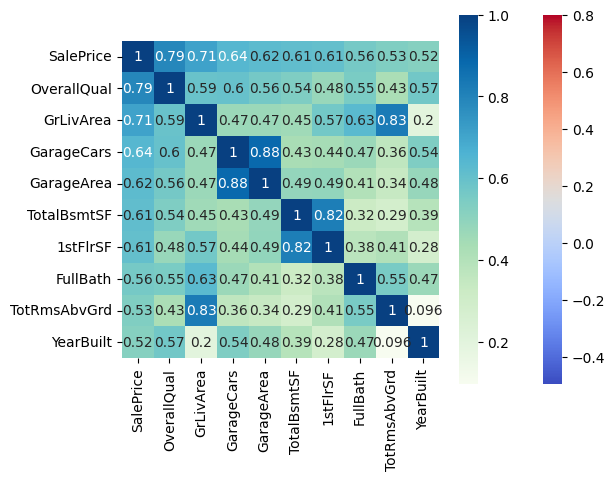

In [15]:
# Task 3.9. Use a heatmap to visualize the correlation among variables.
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, vmax=0.8, square=True, cmap='coolwarm')
sns.heatmap(numeric_data[corr_price.index[:10]].corr(), annot=True, cmap='GnBu')